In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import qiskit
print(qiskit.__version__)

0.46.1


In [3]:
import numpy as np
import math
from math import sqrt
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer, BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import transpile

C:\Users\user\AppData\Local\Temp\ipykernel_11400\3115452656.py:5: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import execute, Aer, BasicAer


# Sirkuit Pertama

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


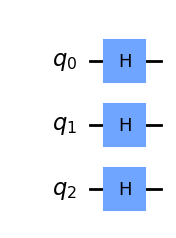

In [4]:
qc = QuantumCircuit(3)        # Buat sirkuit kuantum dengan 4 qubit: q2, q1, q0
qc.h(0)
qc.h(1)
qc.h(2)
#qc.h([0,1,2])
qc.draw('mpl')

In [5]:
# Keadaan Akhir dari qc
psi_1=Statevector(qc)
psi_1.draw('latex')

<IPython.core.display.Latex object>

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


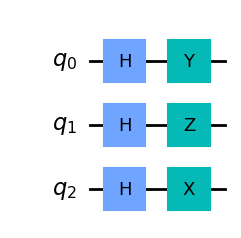

In [6]:
qc.y(0)
qc.z(1)
qc.x(2)
qc.draw('mpl')

In [7]:
# Keadaan Akhir dari qc
psi_2=Statevector(qc)
psi_2.draw('latex')

<IPython.core.display.Latex object>

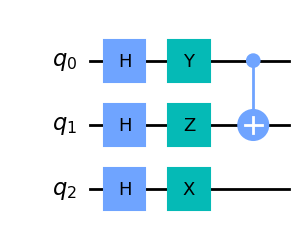

In [8]:
qc.cx(0,1)
qc.draw('mpl')

In [9]:
# Keadaan Akhir dari qc
psi_3=Statevector(qc)
psi_3.draw('latex')

<IPython.core.display.Latex object>

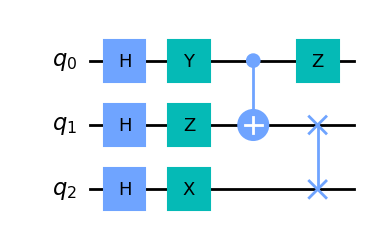

In [10]:
qc.z(0)
qc.swap(1,2) 
qc.draw('mpl')

In [11]:
# Keadaan Akhir dari qc
psi_4=Statevector(qc)
psi_4.draw('latex')

<IPython.core.display.Latex object>

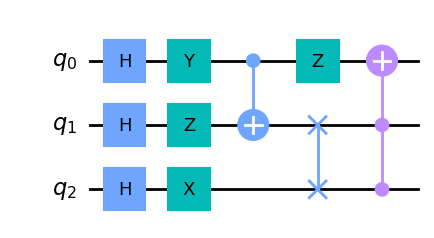

In [12]:
qc.ccx(1,2,0)
qc.draw('mpl')

In [13]:
# Keadaan Akhir dari qc
psi_5=Statevector(qc)
psi_5.draw('latex')

<IPython.core.display.Latex object>

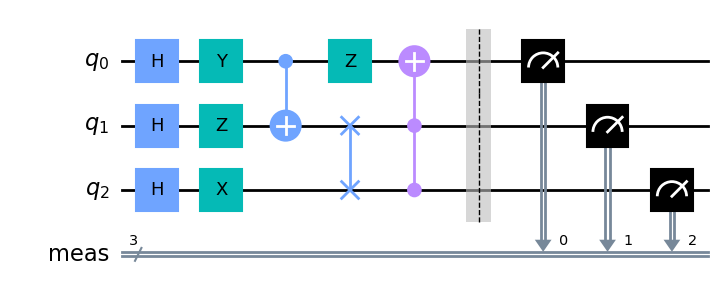

In [14]:
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

C:\Users\user\AppData\Local\Temp\ipykernel_11400\1815697631.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, simulator, shots = 1000)


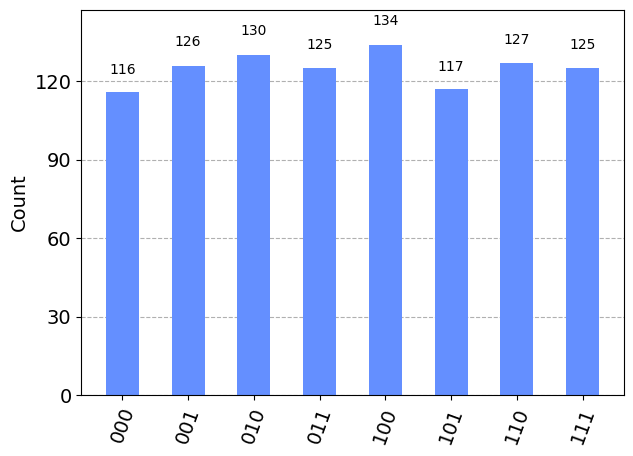

In [15]:
# Simulasikan di komputer lokal
simulator = BasicAer.get_backend("qasm_simulator")
job = execute(qc, simulator, shots = 1000)
result = job.result()
count = result.get_counts()
plot_histogram(count)

# Sirkuit Kedua

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


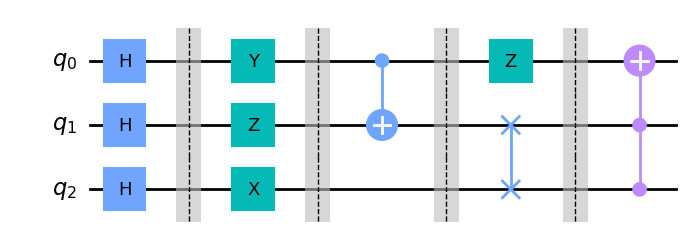

In [16]:
qc = QuantumCircuit(3)        # Buat sirkuit kuantum dengan 4 qubit: q2, q1, q0
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()                  # Beri batas (tidak diproses)
qc.y(0)
qc.z(1)
qc.x(2)
qc.barrier()                  # Beri batas (tidak diproses)
qc.cx(0,1)
qc.barrier()                  # Beri batas (tidak diproses)
qc.z(0)
qc.swap(1,2) 
qc.barrier()                  # Beri batas (tidak diproses)
qc.ccx(1,2,0)
qc.draw('mpl')

In [17]:
# Keadaan Akhir dari qc
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

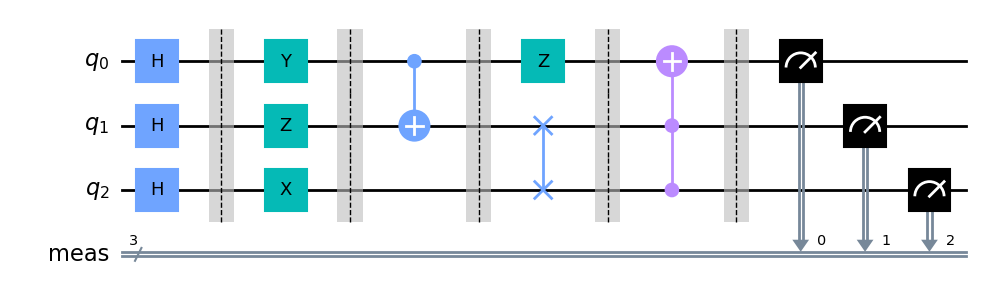

In [18]:
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

C:\Users\user\AppData\Local\Temp\ipykernel_11400\1815697631.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, simulator, shots = 1000)


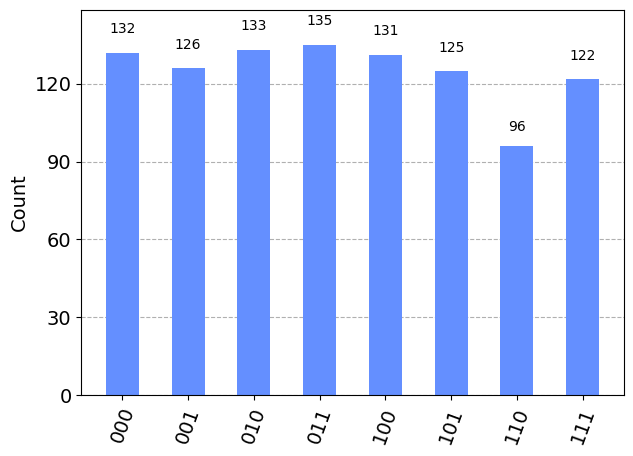

In [19]:
# Simulasikan di komputer lokal
simulator = BasicAer.get_backend("qasm_simulator")
job = execute(qc, simulator, shots = 1000)
result = job.result()
count = result.get_counts()
plot_histogram(count)

# Sirkuit 1-qubiy, 2-qubit dan 3-qubit

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


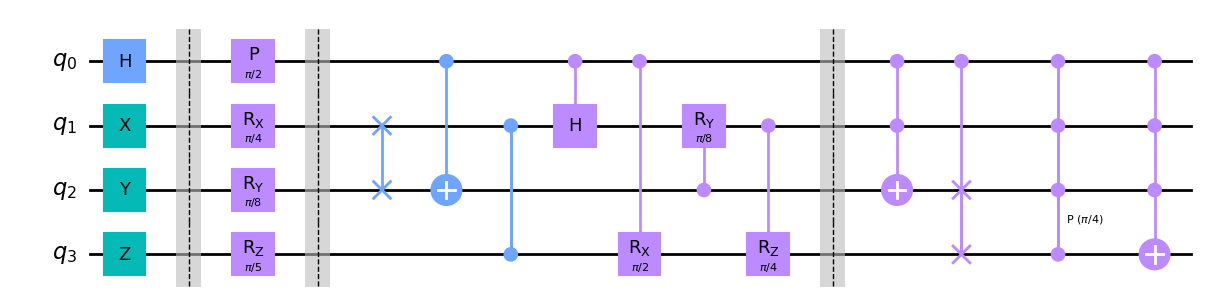

In [20]:
qc = QuantumCircuit(4)        # Buat sirkuit kuantum dengan 4 qubit: q3, q2, q1, q0

# Gerbang 1-qubit
qc.h(0)                       # Terapkan gerbang H pada q0
qc.x(1)                       # Terapkan gerbang X pada q1
qc.y(2)                       # Terapkan gerbang Y pada q2
qc.z(3)                       # Terapkan gerbang Z pada q3
qc.barrier()                  # Beri batas (tidak diproses)

qc.p(math.pi/2,0)             # Terapkan gerbang phase pada q0, nilai parameter pi/2 
qc.rx(math.pi/4,1)            # Rotasi thd sb-x  pada q1, nilai parameter pi/4
qc.ry(math.pi/8,2)            # Rotasi thd sb-y  pada q2, nilai parameter pi/8
qc.rz(math.pi/5,3)            # Rotasi thd sb-z  pada q3, nilai parameter pi/5
qc.barrier()                  # Beri batas (tidak diproses)

# Gerbang 2-qubit
qc.swap(1,2)                  # Nilai q1 ditukar dengan nilai q2 
qc.cx(0,2)                    # Gerbang kontrol-X/CNOT, q0 sebagai kontrol, q2 sebagai target
qc.cz(3,1)                    # Gerbang kontrol-Z, q3 sebagai kontrol, q1 sebagai target
qc.ch(0,1)                    # Gerbang kontrol-H, q0 sebagai kontrol, q1 sebagai target
qc.crx(math.pi/2,0,3)         # Gerbang kontrol-Rx, q0 sebagai kontrol, q3 sebagai target, nilai parameter pi/2
qc.cry(math.pi/8,2,1)         # Gerbang kontrol-Ry, q2 sebagai kontrol, q1 sebagai target, nilai parameter pi/8
qc.crz(math.pi/4,1,3)         # Gerbang kontrol-Rz, q1 sebagai kontrol, q3 sebagai target, nilai parameter pi/4
qc.barrier()                  # Beri batas (tidak diproses)

# Gerbang 3-qubit atau lebih
qc.ccx(0,1,2)                 # Gerbang Kontrol-kontrol-X, q0 dan q1 sebagai kontrol, q2 sebagai target
qc.cswap(0,2,3)               # Gerbang kontrol-Swap, q0 sebagai kontrol, nilai q2 ditukardenagn nilai q3
qc.mcp(math.pi/4, [0,1,2],3)  # Gerbang Multi kontrol phase, [0,1,2] sebagai kontrol, q3 sebagai target
qc.mcx([0,1,2],3)             # Gerbang Multi kontrol-X, [0,1,2] sebagai kontrol, q3 sebagai target
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

In [21]:
# Keadaan Akhir dari qc
psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

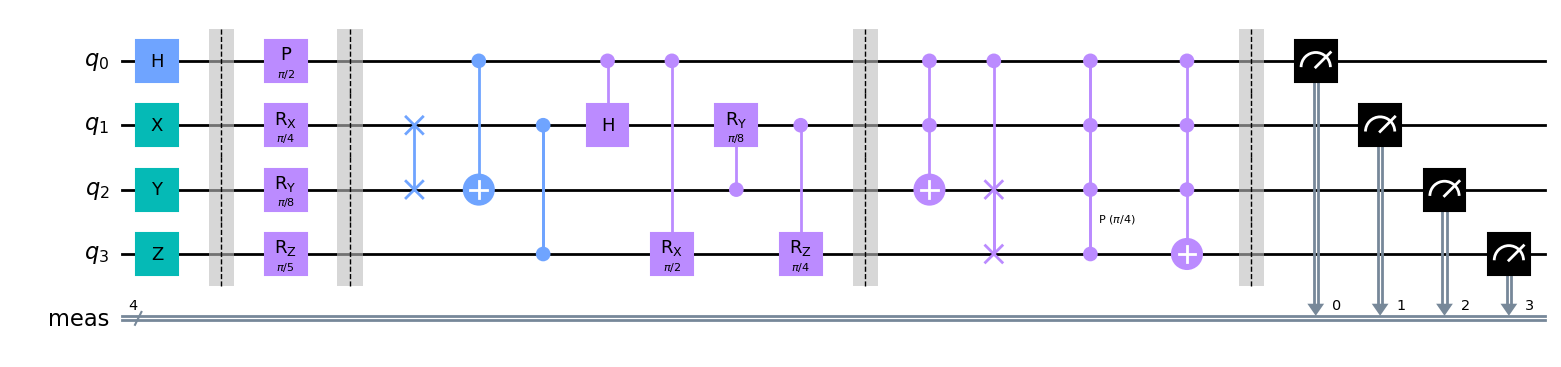

In [22]:
qc. measure_all()             # Pengukuran pada seluruh qubit
qc.draw('mpl')                # Tampilkan gambar sirkuit di layar

C:\Users\user\AppData\Local\Temp\ipykernel_11400\1815697631.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, simulator, shots = 1000)


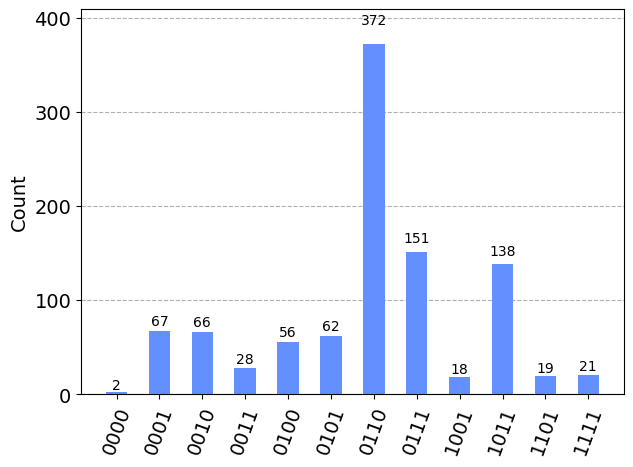

In [23]:
# Simulasikan di komputer lokal
simulator = BasicAer.get_backend("qasm_simulator")
job = execute(qc, simulator, shots = 1000)
result = job.result()
count = result.get_counts()
plot_histogram(count)